# Sentiment Classification using NLP and Classification Algorithm

Sentiment Analysis is a means to identify the view or emotion behind a situation.

It basically means to analyse and find the emotion or intent behind a piece of text or speech or any model of communication.

This burger has a very bad taste- negative review

I ordered this pizza today- neutral sentiment/review

I love this cheese sandwich, its so delicious- positive review

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
df_train=pd.read_csv("train.txt",delimiter=";",names=['text','label'])
df_val=pd.read_csv("val.txt",delimiter=";",names=['text','label'])

In [ ]:
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [ ]:
print("Shape of the dataframe: ",df.shape)
df.sample(5)

Shape of the dataframe:  (18000, 2)


,text,label
14392,i feel impressed to talk to my older children ...,surprise
17360,i think i have a right to know if my neighbour...,anger
12255,i did indeed feel sentimental about this first...,sadness
5608,i continued on my way despite feeling a bit st...,fear
15362,im feeling increasingly comfortable with the r...,joy


<AxesSubplot:xlabel='label', ylabel='count'>

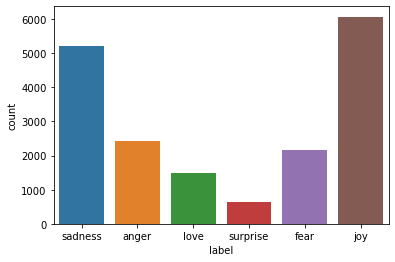

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sns.countplot(df.label)

Positve Sentiment- joy, love, surprise

Negative sentiment- anger, sadness, fear

Now we will create a custom encoder to convert categorical target labels to numerical i.e 0 and 1

In [ ]:
def custom_encoder(df):
    df.replace(to_replace="surprise",value=1, inplace=True)
    df.replace(to_replace="love",value=1, inplace=True)
    df.replace(to_replace="joy",value=1, inplace=True)
    df.replace(to_replace="fear",value=0, inplace=True)
    df.replace(to_replace="anger",value=0, inplace=True)
    df.replace(to_replace="sadness",value=0, inplace=True)

In [ ]:
custom_encoder(df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

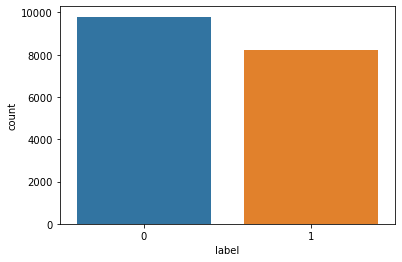

In [ ]:
sns.countplot(df.label)

Preprocessing Steps

1. Get rid of any characters apart from alphabets

2. Convert the string to lowercase because Python is case-sensitive

3. Check and remove the stopwords

4. Perform lemmatization

In [ ]:
lm=WordNetLemmatizer()

In [ ]:
def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item=re.sub('[^a-zA-Z]',' ',str(item))
        new_item=new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
corpus=text_transformation(df['text'])

In [ ]:
corpus[:1]

['didnt feel humiliated']

In [ ]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)
X=traindata
y=df.label

Now we will fit the data into grid search and view the best parameters using the best_params attribute

In [ ]:
parameters={'max_features':('auto','sqrt'),
            'n_estimators':[5,10],
            'max_depth':[10,None],
            'min_samples_split':[5],
            'min_samples_leaf':[1],
            'bootstrap':[True]
           }

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

We can view all the models and their respective parameters, mean test score and rank as GridSearch CV

In [ ]:
for i in range(8):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print("Rank: ",grid_search.cv_results_['rank_test_score'])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test Score:  0.5995
Rank:  [7 6 8 5 3 2 4 1]
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean test Score:  0.616111111111111
Rank:  [7 6 8 5 3 2 4 1]
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test Score:  0.5858333333333333
Rank:  [7 6 8 5 3 2 4 1]
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean test Score:  0.6258888888888889
Rank:  [7 6 8 5 3 2 4 1]
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test Score:  0.9105555555555555
Rank:  [7 6 8 5 3 2 4 1]

Now we will choose the best parameter obtained from GridSearchCV and create a final random forest classifier model and then train our model.

In [ ]:
rfc= RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                           max_depth=grid_search.best_params_['max_depth'],
                           n_estimators=grid_search.best_params_['n_estimators'],
                           min_samples_split=grid_search.best_params_['min_samples_split'],
                           min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                           bootstrap=grid_search.best_params_['bootstrap'])

rfc.fit(X,y)

RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=10)

# Test Data Transformation

In [ ]:
test_df=pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [ ]:
X_test, y_test=test_df.text, test_df.label

# encode the labels into two classes 0 and 1
test_df= custom_encoder(y_test)

# preprocessing of text
test_corpus=text_transformation(X_test)

# convert the text data into vectors
testdata=cv.transform(test_corpus)

#predict the target
predictions=rfc.predict(testdata)

Model Evaluation

We will evaluate our model using various metrics such as accuracy score, precision score, recall score confusion matrix.

In [ ]:
acc_score= accuracy_score(y_test, predictions)
pre_score= precision_score(y_test, predictions)
rec_score=recall_score(y_test, predictions)

print('Accuracy Score:',acc_score)
print("Precision Score:",pre_score)
print('Recall Score',rec_score)

print("-"*50)

cr=classification_report(y_test, predictions)
print(cr)

Accuracy Score: 0.952
Precision Score: 0.9517543859649122
Recall Score 0.9434782608695652
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1080
           1       0.95      0.94      0.95       920

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



ROC Curve- We will plot probability of the class using the predict_proba() method of random forest classifier and then we will plot the curve

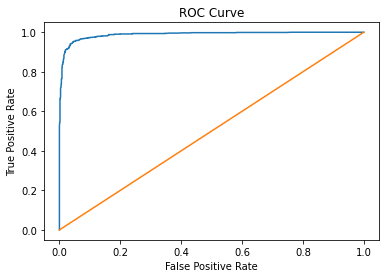

In [ ]:
predictions_probability= rfc.predict_proba(testdata)
fpr,tpr,thresholds=roc_curve(y_test, predictions_probability[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our model performed very well in classifying the sentiments, with an accuracy score, precision score and recall score of approx 96%.

Now we will check for custom input as well and let our model identify the sentiment of the input statement.

In [ ]:
def expression_check(prediction_input):
    if prediction_input==0:
        print("Input statement has negative sentiment")
    elif prediction_input==1:
        print("Input statement has positive sentiment")
    else:
        print("Invalid Statement")

Function to take the input statement and performs the same transformation as we did earlier

In [ ]:
def sentiment_predictor(input):
    input=text_transformation(input)
    transformed_input=cv.transform(input)
    prediction=rfc.predict(transformed_input)
    expression_check(prediction)

In [ ]:
input1=["Sometimes I just don't want to go out"]
input2=["I bought a new phone and it's so good"]

In [ ]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has negative sentiment
Input statement has negative sentiment
